In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('../data/btc_test.npy', mmap_mode='r')

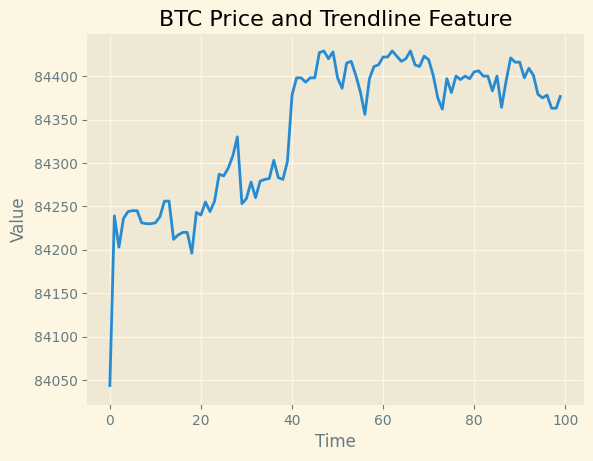

In [3]:
plt.style.use('Solarize_Light2')
plt.plot(data[:100, 3], label='Close Price')
plt.title('BTC Price and Trendline Feature')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

feature_slider = widgets.IntSlider(min=0, max=data.shape[1]-1, step=1, value=0, description='Feature:')
output = widgets.Output()

def plot_feature(change):
    with output:
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        x = np.arange(100)
        ax.plot(x, np.tanh((data[:100, 3]-data[0, 3])*0.001), label='Close Price', color='blue')
        ax.plot(x, np.tanh((data[:100, change['new']]-data[0, change['new']])*0.001), label=f'Feature {change["new"]}', color='orange', alpha=0.7)
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_title(f'Close Price vs Feature {change["new"]}')
        ax.legend()
        plt.tight_layout()
        plt.show()

feature_slider.observe(plot_feature, names='value')
display(feature_slider, output)

# Trigger initial plot
plot_feature({'new': 0})

IntSlider(value=0, description='Feature:', max=90)

Output()

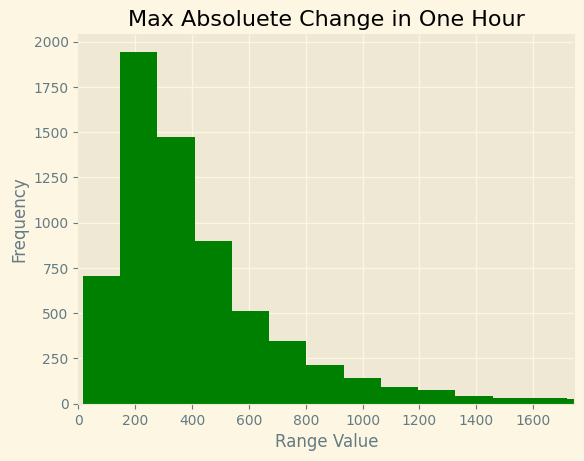

In [31]:
ranges = np.max(np.abs(data[:394800, 3].reshape(-1, 60) - data[:394800, 3].reshape(-1, 60)[:, 0:1]), axis=1)
plt.style.use('Solarize_Light2')
plt.hist(ranges.flatten(), label='Range Feature', color='green', bins=50)
plt.title('Max Absoluete Change in One Hour')
plt.xlabel('Range Value')
plt.ylabel('Frequency')
plt.xlim(0, np.percentile(ranges, 99))
plt.show()

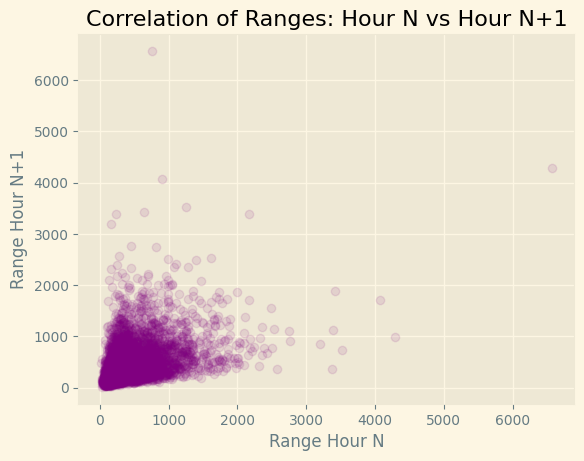

In [30]:
# correlation of ranges of one hour vs next hour
ranges_1 = np.max(np.abs(data[:394740, 3].reshape(-1, 60) - data[:394740, 3].reshape(-1, 60)[:, 0:1]), axis=1)
ranges_2 = np.max(np.abs(data[60:394800, 3].reshape(-1, 60) - data[60:394800, 3].reshape(-1, 60)[:, 0:1]), axis=1)

plt.style.use('Solarize_Light2')
plt.scatter(ranges_1, ranges_2, alpha=0.1, color='purple')
plt.title('Correlation of Ranges: Hour N vs Hour N+1')
plt.xlabel('Range Hour N')
plt.ylabel('Range Hour N+1')
plt.show()

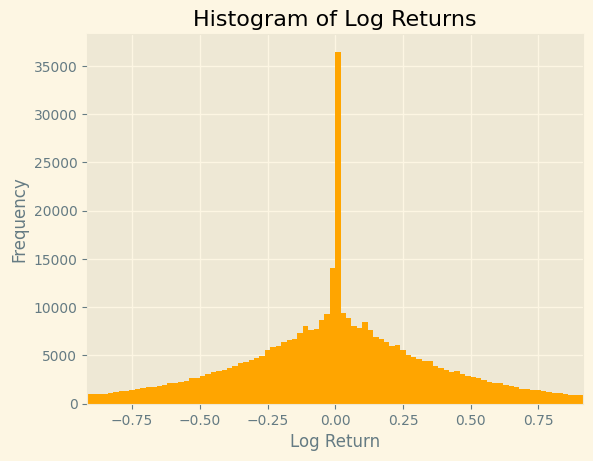

In [42]:
log_return = np.tanh(np.log(data[1:394800, 3] / data[:394799, 3])/0.0005*0.5)
plt.style.use('Solarize_Light2')
plt.hist(log_return.flatten(), bins=100, color='orange')
plt.title('Histogram of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.xlim(np.percentile(log_return, 1), np.percentile(log_return, 99))
plt.show()